#

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

In [3]:
# same link as for finches -> carnivora
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/refs/heads/master/carnivora.csv")

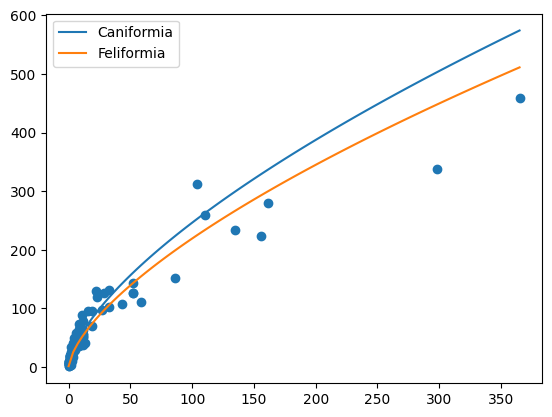

In [6]:
# instantiate and fit model here: log10 both x, y, and 
# unique "intercepts" by SuperFamily
model = smf.ols("np.log10(SB) ~ SuperFamily + np.log10(SW)", data = df)
fit = model.fit()

mn, mx = np.min(df["SW"]), np.max(df["SW"])
x = np.linspace(mn, mx, 101)
ndf = pd.DataFrame.from_dict({
    "SuperFamily": np.repeat(["Caniformia", "Feliformia"], 101),
    "SW": np.tile(x, 2)
})
ndf["yhat"] = fit.predict(ndf)

# make plot here: one line for each SuperFamily
plt.scatter(df["SW"], df["SB"])
for group, gdf in ndf.groupby("SuperFamily"):
    plt.plot(gdf["SW"], 10 ** gdf["yhat"], label = group)
plt.legend()